### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [165]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [166]:
# This command prompts matplotlib visuals to appear in the notebook

%matplotlib inline

In [167]:
# Creating a path for importing/exporting
path = r'/Users/peterguan/Citi Bike Analysis'

In [168]:
# Importing the 'bike_cleaned' dataset
bike_cleaned = pd.read_csv(r'/Users/peterguan/Citi Bike Analysis/02 Data/Prepared Data/bike.csv', index_col = False)

In [169]:
# Checking the top 5 columns
bike_cleaned.head()

,Unnamed: 0.1,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,time_of_day,age_group
0,0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,...,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,45,Night,45-54
1,1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,30,Night,25-34
2,2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,...,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,24,Night,16-24
3,3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,...,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,25,Morning,25-34
4,4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,...,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,35,Night,35-44


In [170]:
# Checking the dimensions
bike_cleaned.shape

(49972, 23)

### 2. The elbow technique

In [172]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [173]:
# Creating a subset with only numerical columns
bike_score = bike_cleaned[['start_hour','trip_duration', 'age']]

In [174]:
# Checking if the subset was created successfully 
bike_score.head()

,start_hour,trip_duration,age
0,18,993,45
1,18,581,30
2,19,361,24
3,11,561,25
4,18,2296,35


In [175]:
score = [kmeans[i].fit(bike_score).score(bike_score) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

In [176]:
# Checking the score
score

[-16452652756.602259,
 -5206168325.453581,
 -2492990190.612055,
 -1410032354.7653456,
 -899520733.7960305,
 -613217102.9122938,
 -453927969.93736446,
 -347558847.63349557,
 -277016952.87683725]

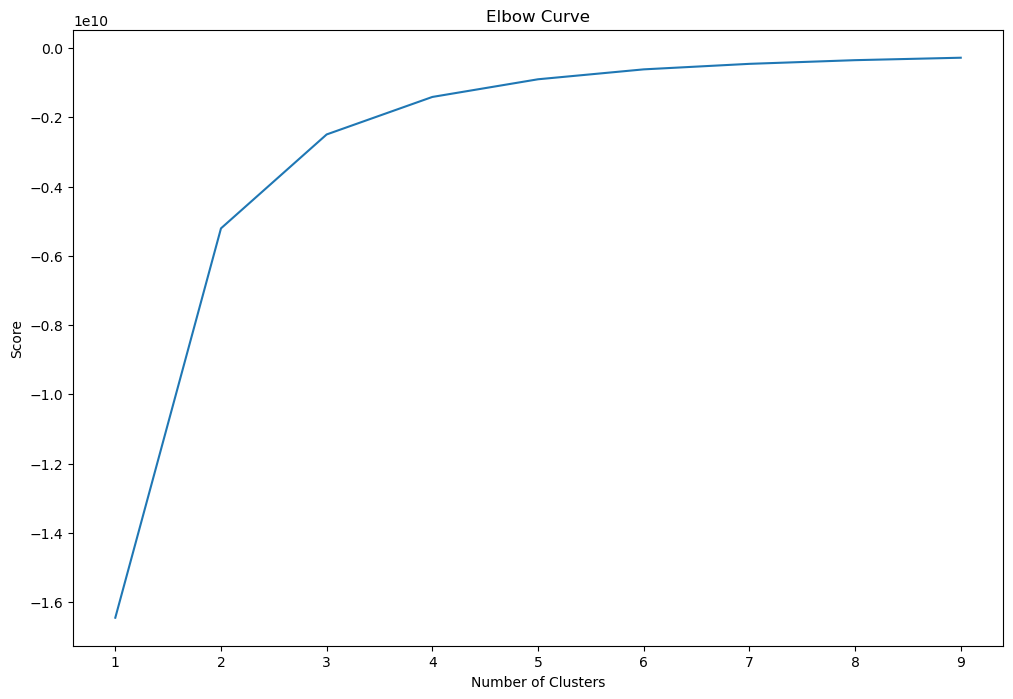

In [177]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering

In [179]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [180]:
# Fit the k-means object to the data.

kmeans.fit(bike_score)

KMeans(n_clusters=3)

In [181]:
# Creating the 'clusters' column
bike_score['clusters'] = kmeans.fit_predict(bike_score)

/var/folders/j8/l8hsy2p15dj9phf2ztxh0b040000gn/T/ipykernel_16146/2254930941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_score['clusters'] = kmeans.fit_predict(bike_score)


In [182]:
# Checking if the column was created successfully 
bike_score.head()

,start_hour,trip_duration,age,clusters
0,18,993,45,0
1,18,581,30,1
2,19,361,24,1
3,11,561,25,1
4,18,2296,35,2


In [183]:
# Checking the frequency of the 'clusters' column
bike_score['clusters'].value_counts()

clusters
1    29229
0    15509
2     5234
Name: count, dtype: int64

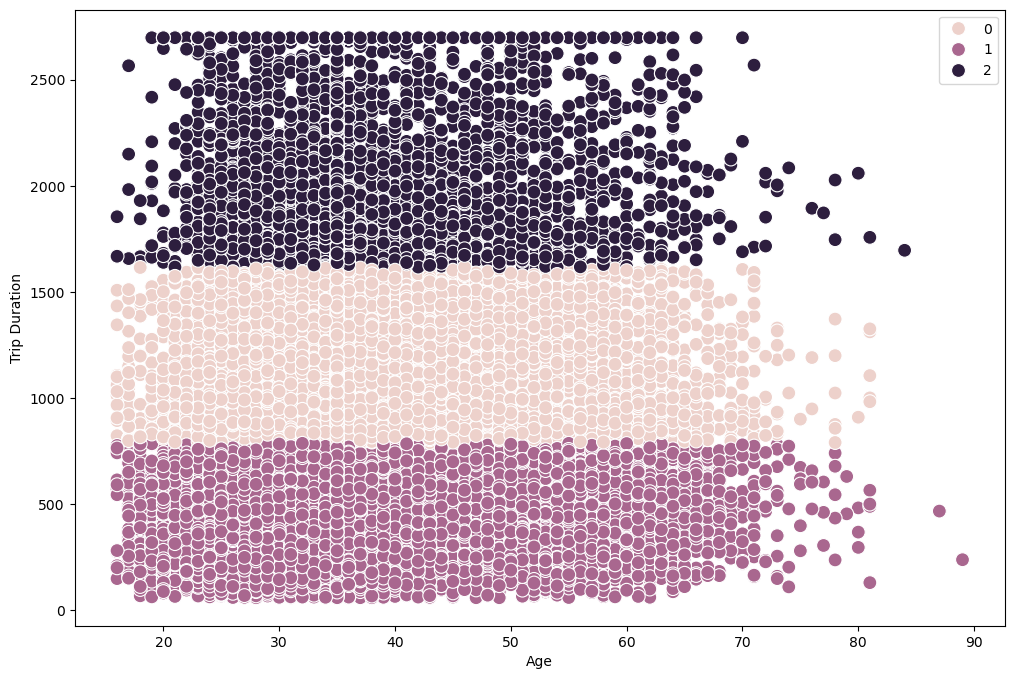

In [187]:
# Plot the clusters for the "age" and "trip_duration" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bike_score['age'], y=bike_score['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Trip Duration') # Label y-axis.
plt.show()

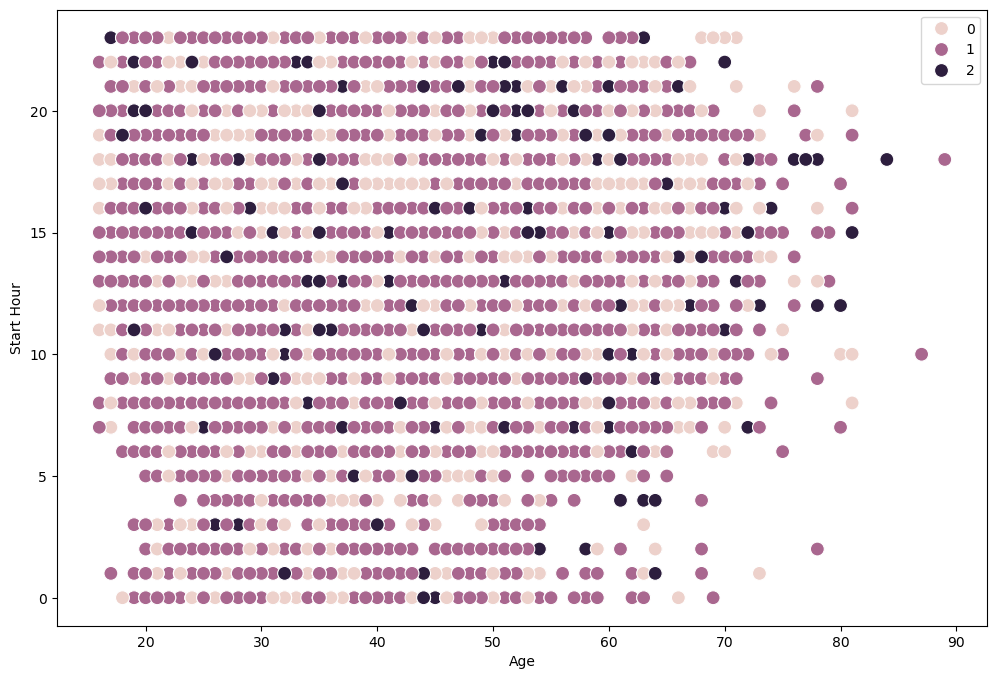

In [189]:
# Plot the clusters for the "age" and "start_hour" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=bike_score['age'], y=bike_score['start_hour'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Start Hour') # Label y-axis.
plt.show()

In [209]:
bike_score.loc[bike_score['clusters'] == 2, 'cluster'] = 'dark purple'
bike_score.loc[bike_score['clusters'] == 1, 'cluster'] = 'purple'
bike_score.loc[bike_score['clusters'] == 0, 'cluster'] = 'pink'

In [211]:
# Calculating the DESCRIPTIVE STATISTICS using GROUPBY
bike_score.groupby('clusters').agg({'start_hour':['mean', 'median'], 
                         'age':['mean', 'median'], 
                         'trip_duration':['mean', 'median']})

start_hour               age        trip_duration        
                  mean median       mean median          mean  median
clusters                                                             
dark purple  14.466374   15.0  37.290982   35.0   2112.817157  2004.0
pink         14.365465   15.0  37.075118   35.0   1123.931008  1089.0
purple       13.972048   15.0  36.909337   35.0    459.571761   456.0